## Import Libraries and Dataset

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Perform Data Analysis

In [62]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
for i in insurance_df.columns:
  print(i, insurance_df[i].unique())

age [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex ['female' 'male']
bmi [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34

In [64]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [65]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [66]:
df_region = insurance_df.groupby(by='region').mean()
df_region

/tmp/ipykernel_104494/2596849640.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_region = insurance_df.groupby(by='region').mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Feature Engineering

In [67]:
insurance_df['sex'] = insurance_df['sex'].apply(lambda x: 0 if x =='female' else 1)
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x =='no' else 1)

In [68]:
dummy_region = pd.get_dummies(insurance_df['region'])

In [69]:
insurance_df = pd.concat([insurance_df, dummy_region], axis=1)
insurance_df = insurance_df.drop(columns=['region'])

In [70]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

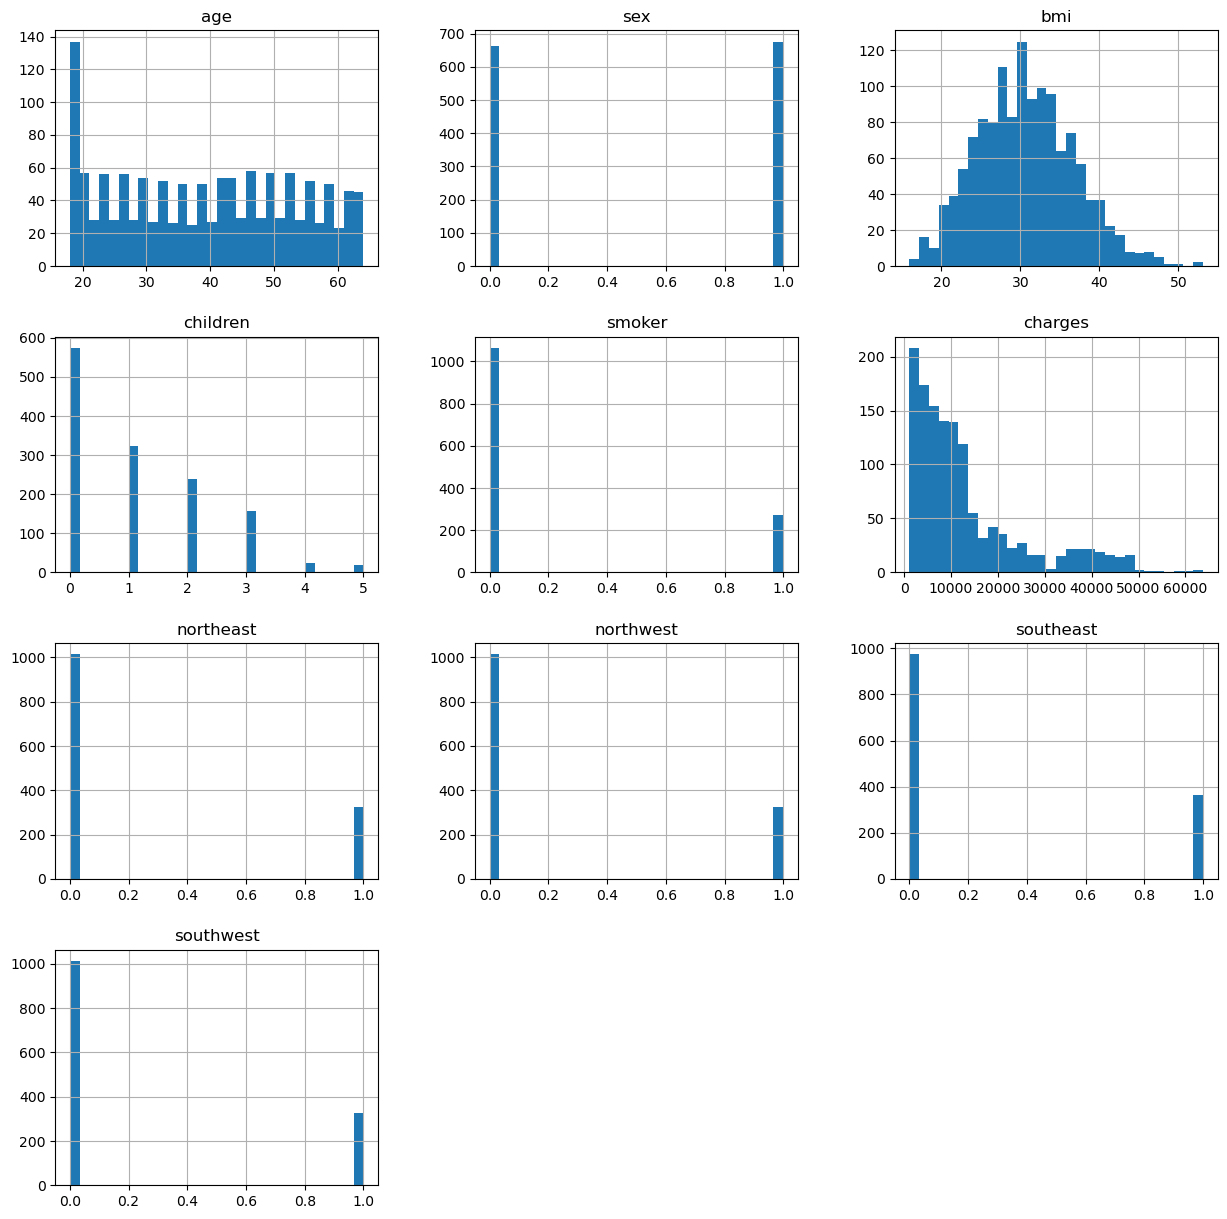

In [71]:
insurance_df.hist(bins=30, figsize=(15,15))

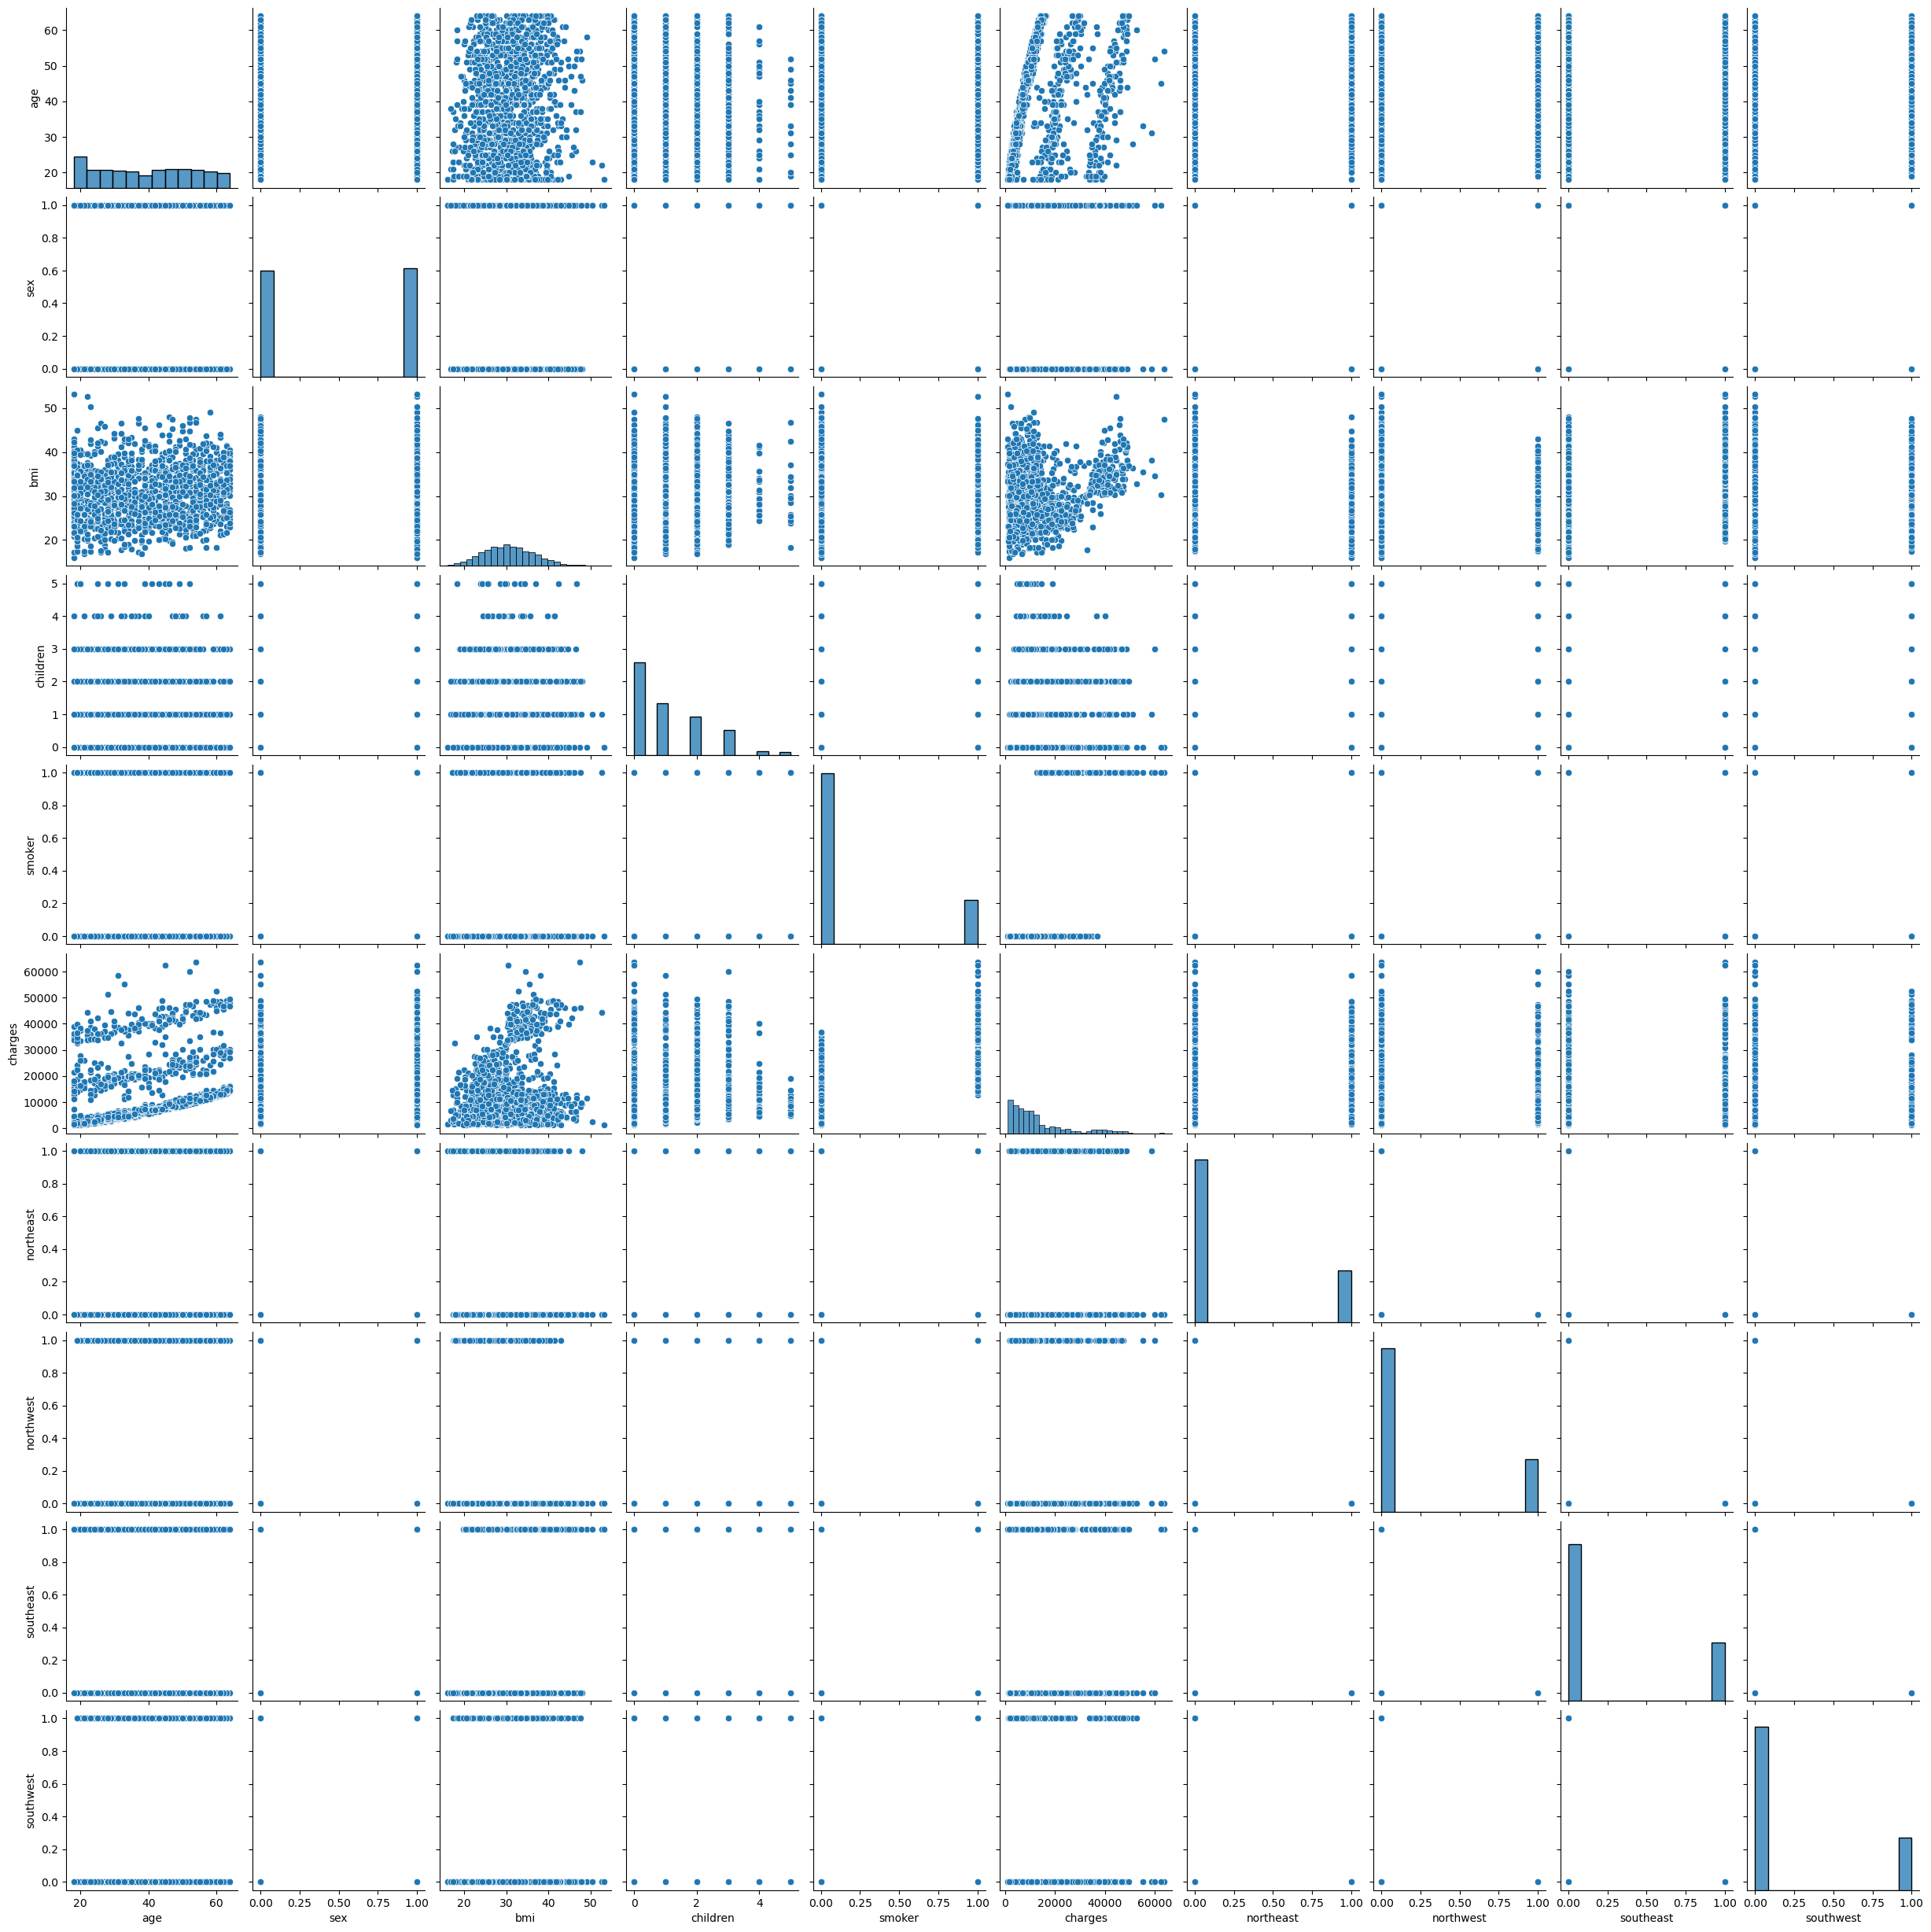

In [72]:
sns.pairplot(insurance_df)

In [ ]:
for i in insurance_df.columns:
  if i is not 'charges':
    sns.regplot(data=insurance_df, x= i, y='charges')
    plt.show()

In [83]:
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<Axes: >

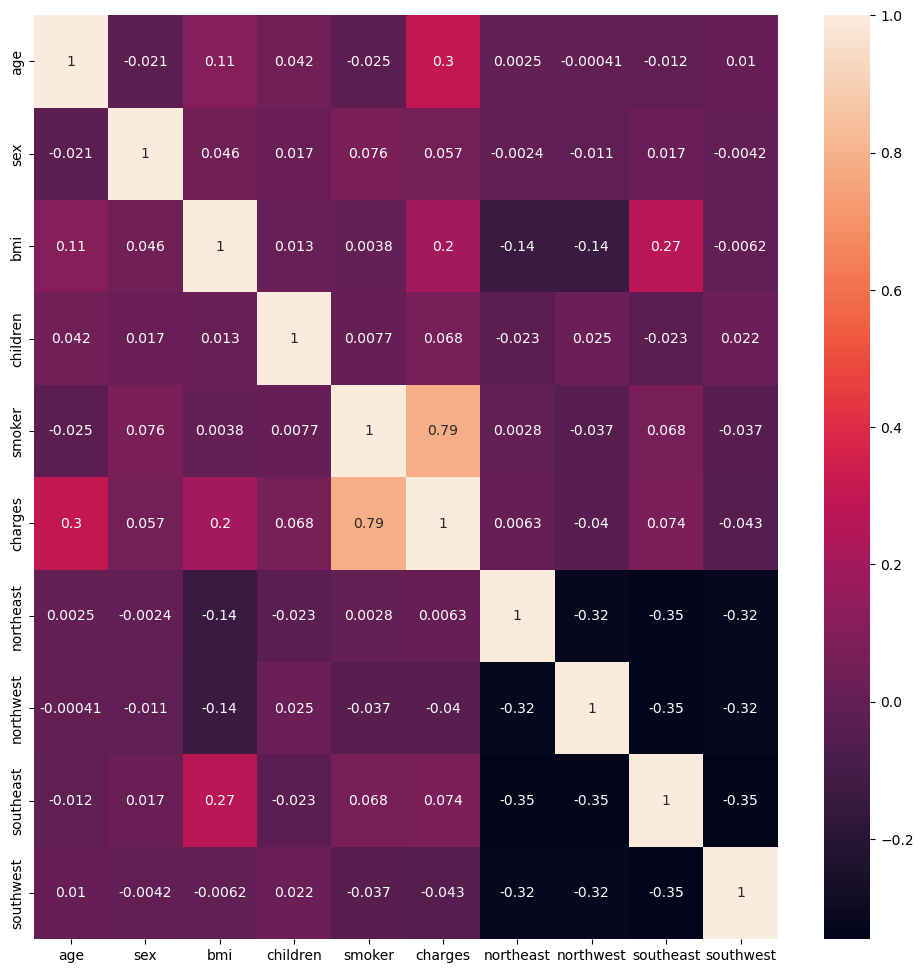

In [86]:
plt.figure(figsize=(12,12))
sns.heatmap(insurance_df.corr(), annot=True)

## Splitting Dataset

In [88]:
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

In [89]:
X.shape

(1338, 9)

In [90]:
y.shape

(1338,)

In [91]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [96]:
y = y.reshape(-1,1)

In [98]:
y.shape

(1338, 1)

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
x_scaler, y_scaler = StandardScaler(), StandardScaler()


X = x_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X_train.shape

(1070, 9)

In [108]:
X_test.shape

(268, 9)

## Train and Evaluate linear regression model

In [110]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
from sklearn.metrics import mean_absolute_error, r2_score

In [111]:
regression_model.score(X_test, y_test)

0.7814160735286924

In [114]:
mean_absolute_error(y_pred=y_pred, y_true=y_test)

0.35005626

## TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL


In [117]:
# type: ignore all
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam

In [146]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 9))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

/home/ubuntu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 50)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 150)            │         7,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 150)            │        22,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,401 (150.00 KB)

 Trainable params: 38,401 (150.00 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8113 - val_loss: 0.2665
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3655 - val_loss: 0.2402
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3287 - val_loss: 0.2230
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2896 - val_loss: 0.2377
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2626 - val_loss: 0.2090
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2844 - val_loss: 0.2415
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2339 - val_loss: 0.2151
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2660 - val_loss: 0.1651
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2351 - val_loss: 0.2051
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2294 - val_loss: 0.1813
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2370 - val_loss: 0.2056
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1

In [148]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.1550
Accuracy : 0.8287113308906555


In [149]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

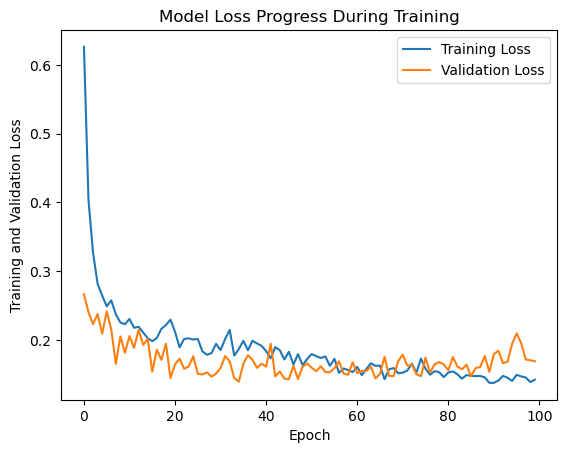

In [150]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Text(0, 0.5, 'True Values')

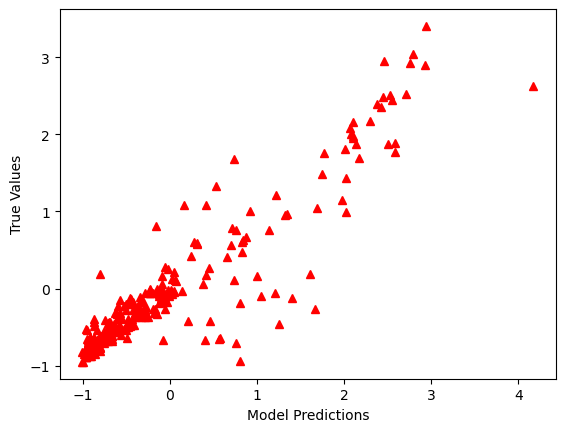

In [151]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [152]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_absolute_error
from math import sqrt

MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


MAE = 0.24925788 
R2 = 0.8383167708001507 
Adjusted R2 = 0.8326766581536442
